In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
stats.expon(scale = 12).cdf(10)

np.float64(0.5654017914929218)

In [3]:
1-stats.expon(scale = 12).cdf(30)

np.float64(0.08208499862389884)

In [4]:
exp_dist = stats.expon(scale = 12)
ex_data = exp_dist.rvs(1000) 

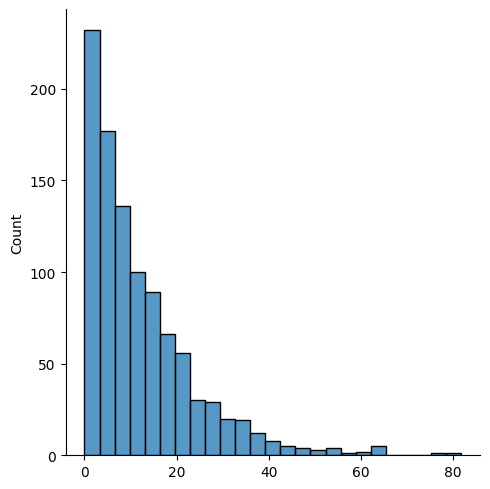

In [5]:

sns.displot(ex_data, bins=25)
plt.show()


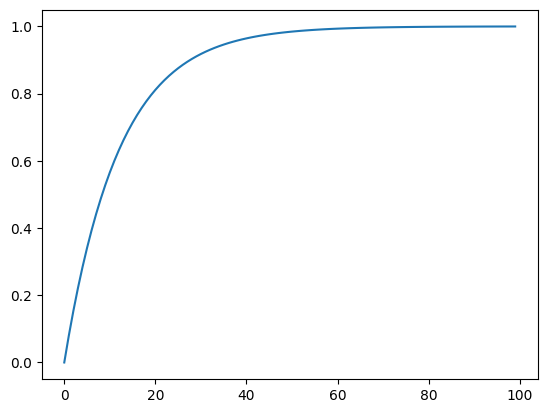

In [6]:
cdf = []
for i in range(100):
    cdf.append(exp_dist.cdf(i))
plt.plot(cdf)

In [7]:
emergency_data = pd.read_csv("911.csv")

In [8]:
emergency_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Problem statement ->
Here we have a data set of 911 calls where our time period is 1 hour so, in that time frequency how many calls are come to the call center.

Here with our normal observation -> we can say that In early hour call numbers are less and mid hour call numbers are very high

with this observation we need to manage the men-power in call center


In [9]:
emergency_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
# Here we need only the date and the hour part from that timestamp
emergency_data["timeStamp"] = pd.to_datetime(emergency_data["timeStamp"])

In [11]:
def d_m_y(x):
    return f"{x.day}-{x.month}-{x.year}"

In [12]:
def hour(x):
    return x.hour

In [13]:
emergency_data["d_m_y"] = emergency_data["timeStamp"].apply(d_m_y)
emergency_data["hour"] = emergency_data["timeStamp"].apply(hour)
print(emergency_data["d_m_y"])
print(emergency_data["hour"])

0        10-12-2015
1        10-12-2015
2        10-12-2015
3        10-12-2015
4        10-12-2015
            ...    
99487     24-8-2016
99488     24-8-2016
99489     24-8-2016
99490     24-8-2016
99491     24-8-2016
Name: d_m_y, Length: 99492, dtype: object
0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: hour, Length: 99492, dtype: int64


In [14]:
emergency_data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,d_m_y,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,10-12-2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,10-12-2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,10-12-2015,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,10-12-2015,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,10-12-2015,17
...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,24-8-2016,11
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,24-8-2016,11
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,24-8-2016,11
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,24-8-2016,11


In [15]:
groupby_date_and_hour = emergency_data.groupby(by=['d_m_y', 'hour'])

In [16]:
groupby_date_and_hour.get_group(name=('10-12-2015', 17)).head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,d_m_y,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,10-12-2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,10-12-2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,10-12-2015,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,10-12-2015,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,10-12-2015,17


In [17]:
CALLS = groupby_date_and_hour.count()['title'].reset_index()

In [18]:
CALLS

,d_m_y,hour,title
0,1-1-2016,0,18
1,1-1-2016,1,9
2,1-1-2016,2,16
3,1-1-2016,3,4
4,1-1-2016,4,5
...,...,...,...
6141,9-8-2016,19,23
6142,9-8-2016,20,10
6143,9-8-2016,21,15
6144,9-8-2016,22,7


In [19]:
CALLS = pd.pivot_table(data = CALLS, values = 'title', index = 'd_m_y', columns = 'hour')

In [20]:
CALLS

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
d_m_y,,,,,,,,,,,,,,,,,,,,,
1-1-2016,18.0,9.0,16.0,4.0,5.0,4.0,5.0,8.0,8.0,7.0,...,16.0,12.0,7.0,18.0,16.0,16.0,9.0,10.0,9.0,12.0
1-2-2016,6.0,4.0,3.0,4.0,5.0,16.0,10.0,22.0,25.0,23.0,...,23.0,18.0,18.0,28.0,28.0,20.0,11.0,15.0,9.0,12.0
1-3-2016,5.0,5.0,2.0,1.0,3.0,6.0,12.0,16.0,27.0,19.0,...,23.0,32.0,32.0,27.0,22.0,13.0,14.0,12.0,13.0,6.0
1-4-2016,14.0,6.0,4.0,8.0,5.0,12.0,12.0,26.0,17.0,13.0,...,26.0,30.0,39.0,37.0,28.0,33.0,27.0,17.0,9.0,12.0
1-5-2016,11.0,5.0,11.0,7.0,4.0,8.0,6.0,6.0,10.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9-4-2016,6.0,4.0,12.0,7.0,6.0,5.0,4.0,7.0,6.0,13.0,...,23.0,28.0,18.0,16.0,17.0,9.0,11.0,12.0,7.0,2.0
9-5-2016,3.0,11.0,5.0,3.0,4.0,7.0,7.0,25.0,15.0,25.0,...,15.0,17.0,29.0,20.0,22.0,16.0,16.0,14.0,7.0,10.0
9-6-2016,6.0,6.0,4.0,5.0,4.0,7.0,12.0,26.0,24.0,13.0,...,34.0,25.0,38.0,40.0,28.0,14.0,5.0,18.0,7.0,10.0


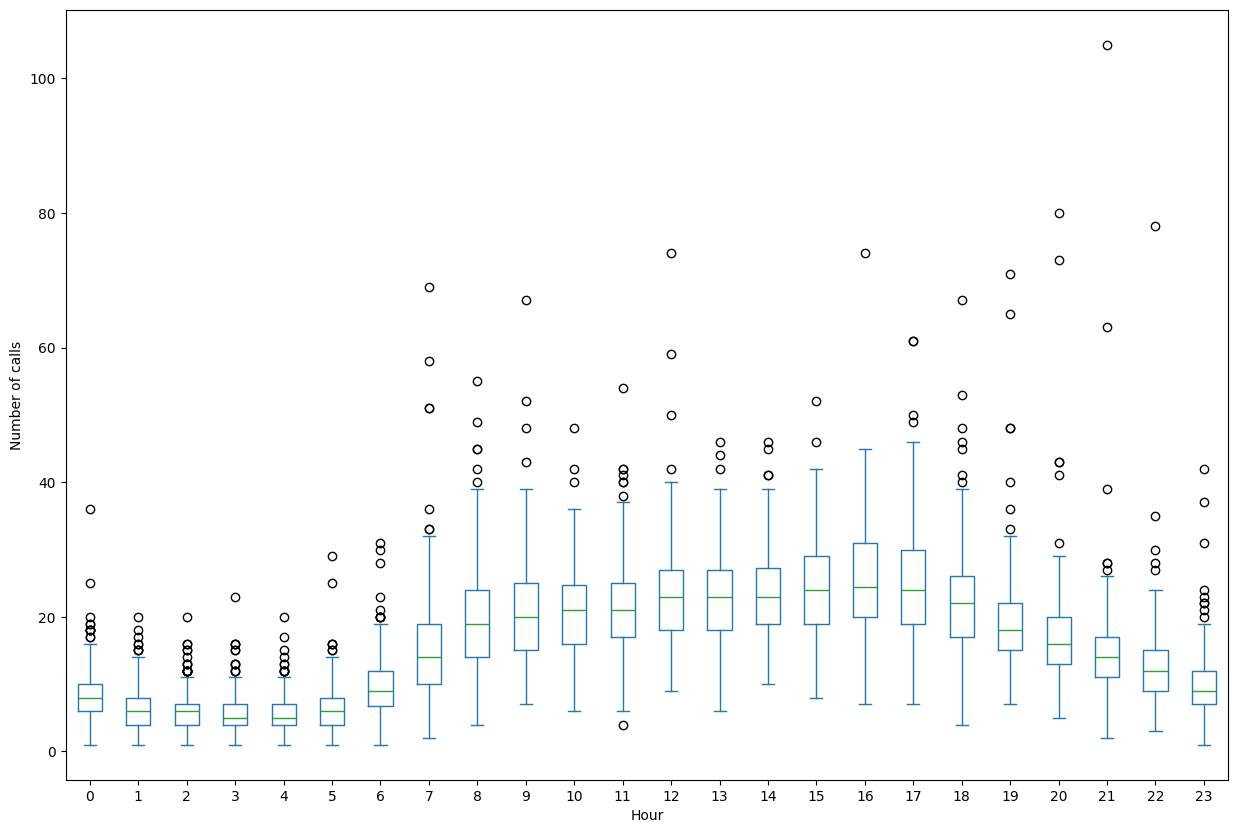

In [21]:
CALLS.plot.box(figsize = (15, 10))
plt.xlabel("Hour")
plt.ylabel("Number of calls")
plt.show()


In [22]:
mean_calls_per_hour = CALLS.mean().reset_index()
mean_calls_per_hour.columns = ['hour', 'no_of_calls']

In [23]:
mean_calls_per_hour

,hour,no_of_calls
0,0,8.282353
1,1,6.775591
2,2,6.122530
3,3,5.605469
4,4,5.604743
5,5,6.363281
6,6,9.816406
7,7,15.447471
8,8,19.550388
9,9,20.596899


In [24]:
median_calls_per_hour = CALLS.median().reset_index()
median_calls_per_hour.columns = ['hour', 'no_of_calls']

In [25]:
median_calls_per_hour

,hour,no_of_calls
0,0,8.0
1,1,6.0
2,2,6.0
3,3,5.0
4,4,5.0
5,5,6.0
6,6,9.0
7,7,14.0
8,8,19.0
9,9,20.0


In [26]:
CALLS.isna().sum()

hour
0     4
1     5
2     6
3     3
4     6
5     3
6     3
7     2
8     1
9     1
10    1
11    2
12    3
13    3
14    3
15    3
16    3
17    2
18    2
19    3
20    3
21    2
22    2
23    4
dtype: int64

In [27]:
CALLS.fillna(0, inplace=True)


In [28]:
calls_at_5pm = CALLS[17].values
calls_at_5pm

array([18., 28., 27., 37.,  0., 31., 26., 34., 33., 22., 24., 24., 17.,
       37., 23., 20., 20., 24., 35., 20., 21., 20., 30., 19., 39., 22.,
       22., 19., 16., 14., 26., 26., 18., 32., 23., 28., 19., 17., 18.,
       23., 35., 24., 49., 19., 26., 30., 21., 24., 17., 26., 34., 38.,
       21., 29., 32., 37., 24., 32.,  7., 26., 26., 23., 15., 32., 22.,
       16., 12., 36., 25., 19., 23., 15., 30., 20., 27., 24., 34., 31.,
       19., 22., 16., 46., 23., 23., 40., 28., 18., 15., 30., 19., 25.,
       25., 12., 19., 29., 18., 37., 37., 22., 27., 23., 27., 17., 37.,
       19., 26., 29., 13., 15., 16., 24., 29., 21., 15., 14., 28., 37.,
       20., 27., 29., 17., 27., 33., 24., 40., 36., 20., 16., 15., 11.,
       27., 21., 24., 61., 61., 23., 30., 23., 33., 35., 50., 28., 45.,
       25., 24., 23., 24., 13., 17., 19.,  0., 27., 22., 25., 20., 41.,
       35., 18., 30., 38., 12., 37., 19., 28., 33., 18., 26., 29., 24.,
       28.,  8., 21., 36., 16., 30., 19., 25., 15., 36., 31., 26

In [29]:
# Standard error using data itself
np.std(calls_at_5pm)/np.sqrt(100)

np.float64(0.877764561294895)

In [30]:
np.mean(calls_at_5pm)

np.float64(25.16216216216216)

In [31]:
calls_at_5pm.shape

(259,)

In [32]:
median_calls_per_hour

,hour,no_of_calls
0,0,8.0
1,1,6.0
2,2,6.0
3,3,5.0
4,4,5.0
5,5,6.0
6,6,9.0
7,7,14.0
8,8,19.0
9,9,20.0


In [33]:
# Here we do the clt(central limit theorem)

mean_of_calls_at_5pm = []

for i in range(1000):
    mean = np.random.choice(calls_at_5pm, size = 100).mean()
    mean_of_calls_at_5pm.append(mean)

mean_of_calls_at_5pm = np.array(mean_of_calls_at_5pm)


C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_24832\1794664110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_of_calls_at_5pm, bins=25)


<Axes: ylabel='Density'>

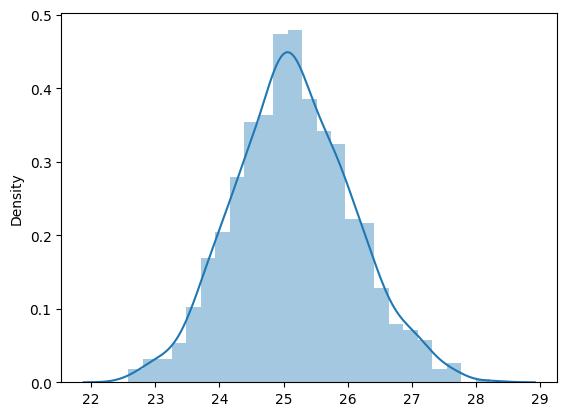

In [34]:
sns.distplot(mean_of_calls_at_5pm, bins=25)

In [35]:
np.mean(mean_of_calls_at_5pm)

np.float64(25.15682)

In [36]:
np.std(mean_of_calls_at_5pm)

np.float64(0.9192657328542166)

In [37]:
np.percentile(mean_of_calls_at_5pm, 99.5)

np.float64(27.62)

In [38]:
# Now we will calculate the poission distribution that's generate the in an hour how many calls are happen
poission_distribution_hour_wise = {}

In [39]:
for row in median_calls_per_hour.iterrows():
    # print(type(row))
    poission_distribution_hour_wise[int(row[1]['hour'])] = stats.poisson(mu = row[1]['no_of_calls'])

In [40]:
for hour in poission_distribution_hour_wise:
    print("At hour {}, there is a 99.99% probability that, less then {} call will arrive."\
          .format(hour, poission_distribution_hour_wise[hour].ppf(0.9999)))

At hour 0, there is a 99.99% probability that, less then 20.0 call will arrive.
At hour 1, there is a 99.99% probability that, less then 17.0 call will arrive.
At hour 2, there is a 99.99% probability that, less then 17.0 call will arrive.
At hour 3, there is a 99.99% probability that, less then 15.0 call will arrive.
At hour 4, there is a 99.99% probability that, less then 15.0 call will arrive.
At hour 5, there is a 99.99% probability that, less then 17.0 call will arrive.
At hour 6, there is a 99.99% probability that, less then 22.0 call will arrive.
At hour 7, there is a 99.99% probability that, less then 30.0 call will arrive.
At hour 8, there is a 99.99% probability that, less then 37.0 call will arrive.
At hour 9, there is a 99.99% probability that, less then 39.0 call will arrive.
At hour 10, there is a 99.99% probability that, less then 40.0 call will arrive.
At hour 11, there is a 99.99% probability that, less then 40.0 call will arrive.
At hour 12, there is a 99.99% probabil

In [41]:
for hour in poission_distribution_hour_wise:
    print("At Hour {}, The no. of stuff required is {}"\
          .format(hour, np.ceil(poission_distribution_hour_wise[hour].ppf(0.9999)/10)))

At Hour 0, The no. of stuff required is 2.0
At Hour 1, The no. of stuff required is 2.0
At Hour 2, The no. of stuff required is 2.0
At Hour 3, The no. of stuff required is 2.0
At Hour 4, The no. of stuff required is 2.0
At Hour 5, The no. of stuff required is 2.0
At Hour 6, The no. of stuff required is 3.0
At Hour 7, The no. of stuff required is 3.0
At Hour 8, The no. of stuff required is 4.0
At Hour 9, The no. of stuff required is 4.0
At Hour 10, The no. of stuff required is 4.0
At Hour 11, The no. of stuff required is 4.0
At Hour 12, The no. of stuff required is 5.0
At Hour 13, The no. of stuff required is 5.0
At Hour 14, The no. of stuff required is 5.0
At Hour 15, The no. of stuff required is 5.0
At Hour 16, The no. of stuff required is 5.0
At Hour 17, The no. of stuff required is 5.0
At Hour 18, The no. of stuff required is 5.0
At Hour 19, The no. of stuff required is 4.0
At Hour 20, The no. of stuff required is 4.0
At Hour 21, The no. of stuff required is 3.0
At Hour 22, The no. 

In [42]:
# Now we understand what is ppf
a = stats.poisson.rvs(mu = 26, size =100)

In [43]:
stats.poisson.pmf(k = 20, mu = 26)

np.float64(0.04184907017542913)

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_24832\982467660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, bins=20)


<Axes: ylabel='Density'>

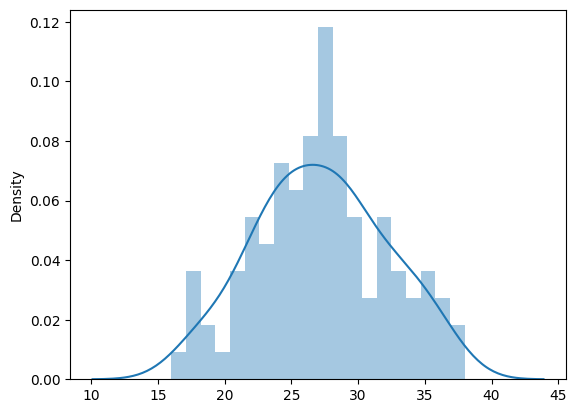

In [44]:
sns.distplot(a, bins=20)


In [45]:
geom_dist = stats.geom(p = 0.08)

In [46]:
a = geom_dist.rvs(1000)

C:\Users\sangram.samanta\AppData\Local\Temp\ipykernel_24832\207145564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, bins=50)


<Axes: ylabel='Density'>

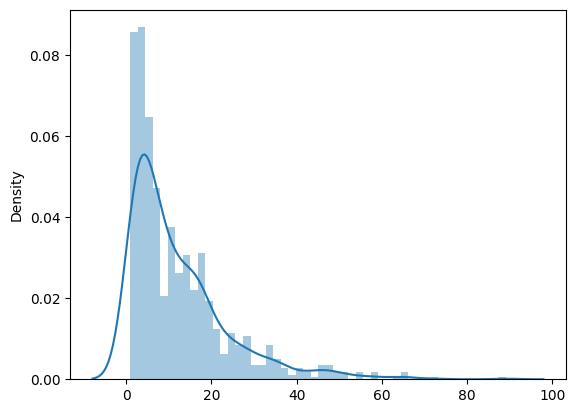

In [47]:
sns.distplot(a, bins=50)

In [48]:
geom_dist.pmf(10)*100

np.float64(3.7772909062924547)

In [49]:
geom_dist.pmf(3)*100

np.float64(6.771200000000001)

In [50]:
lognorm = stats.lognorm(s = 1, loc = 0, scale = 5)

In [51]:
a = lognorm.pdf(np.arange(0, 20, 0.1))

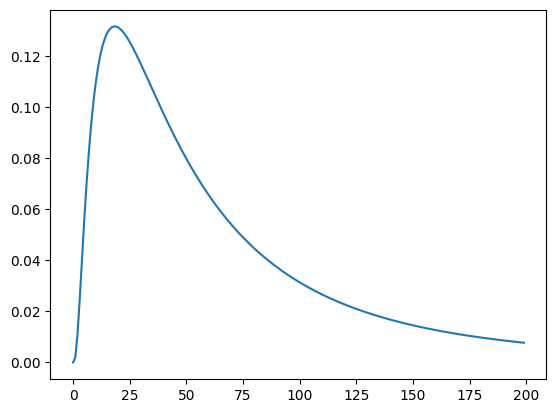

In [52]:
plt.plot(a)
plt.show()

In [53]:
a = stats.pareto(1).pdf(np.arange(1, 5, 0.5))
a

array([1.        , 0.44444444, 0.25      , 0.16      , 0.11111111,
       0.08163265, 0.0625    , 0.04938272])

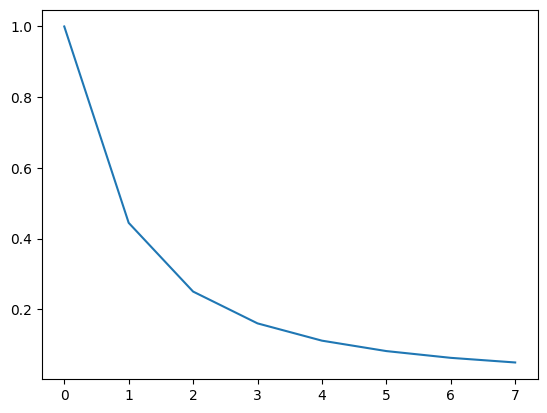

In [54]:
plt.plot(a)
plt.show()

In [55]:
stats.pareto(1).pdf(4)*100

np.float64(6.25)

In [56]:
stats.pareto(1).cdf(3)*100

np.float64(66.66666666666667)

In [57]:
b = stats.pareto(a)

b.cdf(5)

array([0.8       , 0.51095743, 0.3312597 , 0.22702615, 0.16374897,
       0.12311786, 0.09569616, 0.07640204])

In [64]:
x = np.linspace(1, 9, 100)
x

array([1.        , 1.08080808, 1.16161616, 1.24242424, 1.32323232,
       1.4040404 , 1.48484848, 1.56565657, 1.64646465, 1.72727273,
       1.80808081, 1.88888889, 1.96969697, 2.05050505, 2.13131313,
       2.21212121, 2.29292929, 2.37373737, 2.45454545, 2.53535354,
       2.61616162, 2.6969697 , 2.77777778, 2.85858586, 2.93939394,
       3.02020202, 3.1010101 , 3.18181818, 3.26262626, 3.34343434,
       3.42424242, 3.50505051, 3.58585859, 3.66666667, 3.74747475,
       3.82828283, 3.90909091, 3.98989899, 4.07070707, 4.15151515,
       4.23232323, 4.31313131, 4.39393939, 4.47474747, 4.55555556,
       4.63636364, 4.71717172, 4.7979798 , 4.87878788, 4.95959596,
       5.04040404, 5.12121212, 5.2020202 , 5.28282828, 5.36363636,
       5.44444444, 5.52525253, 5.60606061, 5.68686869, 5.76767677,
       5.84848485, 5.92929293, 6.01010101, 6.09090909, 6.17171717,
       6.25252525, 6.33333333, 6.41414141, 6.49494949, 6.57575758,
       6.65656566, 6.73737374, 6.81818182, 6.8989899 , 6.97979

In [65]:
perito_dist = stats.pareto(b = 2, loc = 0, scale = 1)

In [66]:
d = perito_dist.pdf(x)
d

array([2.        , 1.58410603, 1.27597469, 1.04284616, 0.86322039,
       0.72258872, 0.61091892, 0.52112329, 0.44809775, 0.38810322,
       0.33835803, 0.29676369, 0.26171689, 0.23197836, 0.20657997,
       0.18475799, 0.16590444, 0.14953126, 0.13524361, 0.12271974,
       0.11169566, 0.10195342, 0.093312  , 0.08562021, 0.0787511 ,
       0.07259756, 0.06706879, 0.06208746, 0.05758747, 0.05351205,
       0.04981229, 0.04644588, 0.0433761 , 0.040571  , 0.03800265,
       0.03564659, 0.03348133, 0.03148794, 0.02964971, 0.02795182,
       0.02638114, 0.02492596, 0.02357587, 0.02232155, 0.02115466,
       0.0200677 , 0.01905395, 0.01810734, 0.01722242, 0.01639423,
       0.01561831, 0.01489058, 0.01420738, 0.01356533, 0.0129614 ,
       0.0123928 , 0.01185697, 0.01135159, 0.01087453, 0.01042383,
       0.0099977 , 0.00959448, 0.00921265, 0.00885082, 0.0085077 ,
       0.00818208, 0.00787287, 0.00757904, 0.00729966, 0.00703384,
       0.00678078, 0.0065397 , 0.00630993, 0.00609079, 0.00588

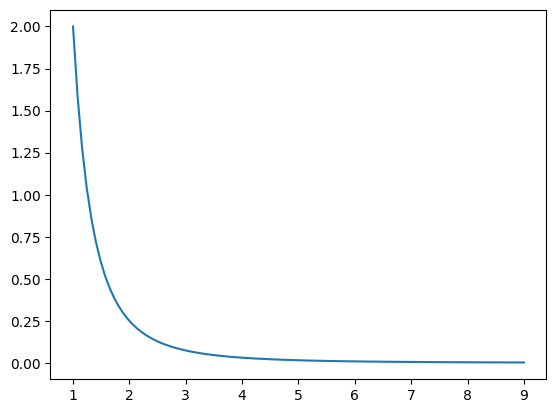

In [67]:
plt.plot(x, d)


In [68]:
perito_dist.cdf(5)

np.float64(0.96)

In [69]:
1 - perito_dist.cdf(5)

np.float64(0.040000000000000036)